In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

#### Generate data

In [2]:
X = np.linspace(0,20,30).reshape(30,1)
Y = (-1*X+2).reshape(30,1)

#### Plot data points.

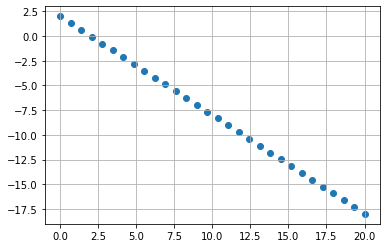

In [3]:
plt.scatter(X,Y)
plt.grid()
plt.show()

## Adagrad

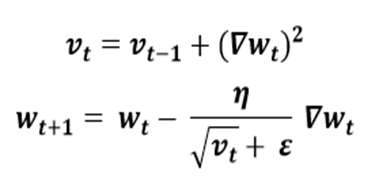

In [4]:
def Adagrad(X, Y, alpha, Epsilon, Iterations):
    theta_0 , theta_1 = 0 , 0
    Vt0 = 0
    Vt1 = 0
    m = X.size
    J_L = []
    H_L = []
    theta_0L = [0]
    theta_1L = [0]
    for i in range(Iterations):
        h = theta_0 + theta_1 * X
        H_L.append(h)
    
        J = (1/(2*m))*sum((h - Y)**2)
        J_L.extend(J)

        dtheta_0 = (1/m)*sum(h - Y)
        dtheta_1 = (1/m)*sum((h - Y)* X)
        
        Vt0 = Vt0 + dtheta_0**2
        Vt1 = Vt1 + dtheta_1**2
        
        dtheta = np.array([dtheta_0,
                          dtheta_1])
        if np.linalg.norm(dtheta) < 0.1:
            break
        
        if i > 1 and abs(J_L[-2]- J_L[-1]) < 0.001:
            break
    
        if i < Iterations-1:
            theta_0 = theta_0 - (alpha/(np.sqrt(Vt0)+Epsilon))*dtheta_0
            theta_0L.extend(theta_0)
            theta_1 = theta_1 - (alpha/(np.sqrt(Vt1)+Epsilon))*dtheta_1
            theta_1L.extend(theta_1)
            
    return theta_0L, theta_1L, J_L, H_L, theta_0, theta_1

In [5]:
alpha = 0.5
Epsilon = 1e-8
Iterations = 100000
theta_0L, theta_1L, J_L, H_L, theta_0, theta_1 = Adagrad(X, Y, alpha, Epsilon, Iterations)

In [6]:
print(theta_0)
print(theta_1)

[1.47324368]
[-0.96019314]


In [7]:
r2_score(Y,theta_0+ theta_1*X)

0.9979506506719295

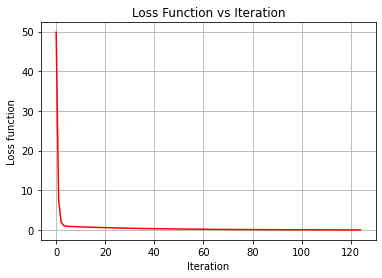

In [8]:
iterations = [i for i in range(len(J_L))]
plt.figure()
plt.plot(iterations ,J_L, c = 'r')
plt.title("Loss Function vs Iteration")
plt.xlabel("Iteration")
plt.ylabel("Loss function")
plt.grid()
plt.show()

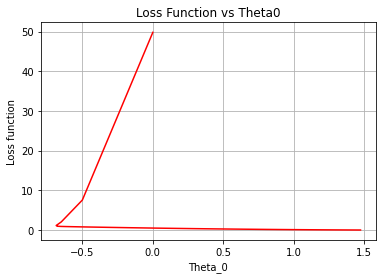

In [9]:
plt.figure()
plt.plot(theta_0L ,J_L, c = 'r')
plt.title("Loss Function vs Theta0")
plt.xlabel("Theta_0")
plt.ylabel("Loss function")
plt.grid()
plt.show()

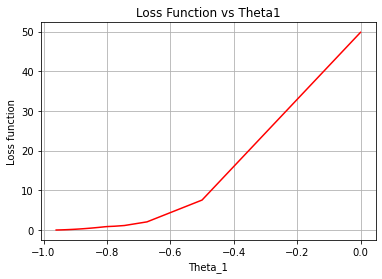

In [10]:
plt.figure()
plt.plot(theta_1L ,J_L, c = 'r')
plt.title("Loss Function vs Theta1")
plt.xlabel("Theta_1")
plt.ylabel("Loss function")
plt.grid()
plt.show()

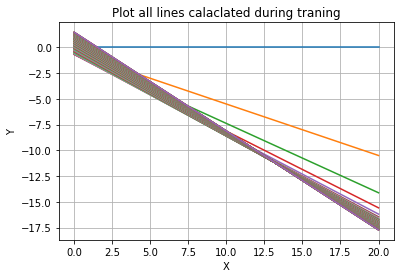

In [11]:
plt.figure()
plt.plot(X , theta_0L + theta_1L*X)
plt.title("Plot all lines calaclated during traning")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.show()

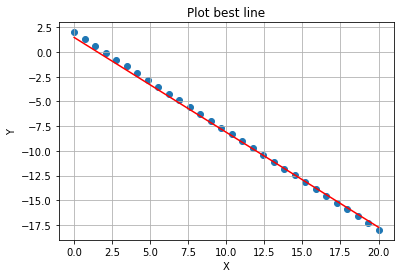

In [12]:
plt.figure()
plt.scatter(X,Y)
plt.plot(X , theta_0 + theta_1*X, c='r')
plt.title("Plot best line")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.show()